## 複数の変数の線形回帰

家の大きさと寝室の数から、家の売却額を予想する線形回帰

Source: http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-2/

In [3]:
# ライブラリの読み込み
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# データの取得
path = '../data/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
# feature normalization(feature scalling)
# 家のサイズや寝室の数などスケールが異なるので正規化をする
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [6]:
# コストファンクションの定義
def computeCost(X, y, theta):
    # 1/2m∑(Xθ - y)^2 を計算
    #  X: トレーニングセット
    #  y: ラベル（正解の値）
    #  m: トレーニングセット数
    #  θ: 係数（求めたい値）
    inner = np.power(((X * theta.T) - y), 2) # Tは転置行列に変換(列と行を入れ替える）
    m = len(X)
    return np.sum(inner) / (2 * m)

In [7]:
# Gradient Descentの定義
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    m = len(X)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / m) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [8]:
# Onesカラムを追加
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [9]:
# X (トレーニングセット)、y（正解ラベル）を設定
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [10]:
# 行列(matrice)に変換する
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape

((47, 3), (47, 1))

In [11]:
# θ（シータ）、α（learning rate）、繰り返し回数を初期化
theta = np.matrix(np.array([0, 0, 0]))
alpha = 0.01
iters = 1000

In [12]:
# トレーニングセットに対して、線形回帰を実行する
g, cost = gradientDescent(X, y, theta, alpha, iters)
g, cost

(matrix([[ -1.04077503e-16,   8.78503652e-01,  -4.69166570e-02]]),
 array([ 0.4805491 ,  0.47198588,  0.46366462,  0.45557814,  0.44771948,
         0.44008189,  0.43265881,  0.42544389,  0.41843096,  0.41161404,
         0.40498735,  0.39854524,  0.39228228,  0.38619317,  0.38027278,
         0.37451612,  0.36891839,  0.36347488,  0.35818107,  0.35303254,
         0.34802503,  0.34315438,  0.33841659,  0.33380775,  0.32932407,
         0.3249619 ,  0.32071767,  0.31658793,  0.31256934,  0.30865863,
         0.30485268,  0.30114841,  0.29754287,  0.29403318,  0.29061655,
         0.28729027,  0.28405173,  0.28089837,  0.27782772,  0.27483739,
         0.27192505,  0.26908845,  0.26632541,  0.26363379,  0.26101154,
         0.25845666,  0.25596722,  0.25354134,  0.25117719,  0.248873  ,
         0.24662705,  0.24443769,  0.24230329,  0.24022228,  0.23819315,
         0.23621442,  0.23428466,  0.23240248,  0.23056652,  0.22877549,
         0.22702811,  0.22532316,  0.22365943,  0.2220357

In [13]:
# モデルのコストを取得
computeCost(X, y, g)

0.13070336960771892

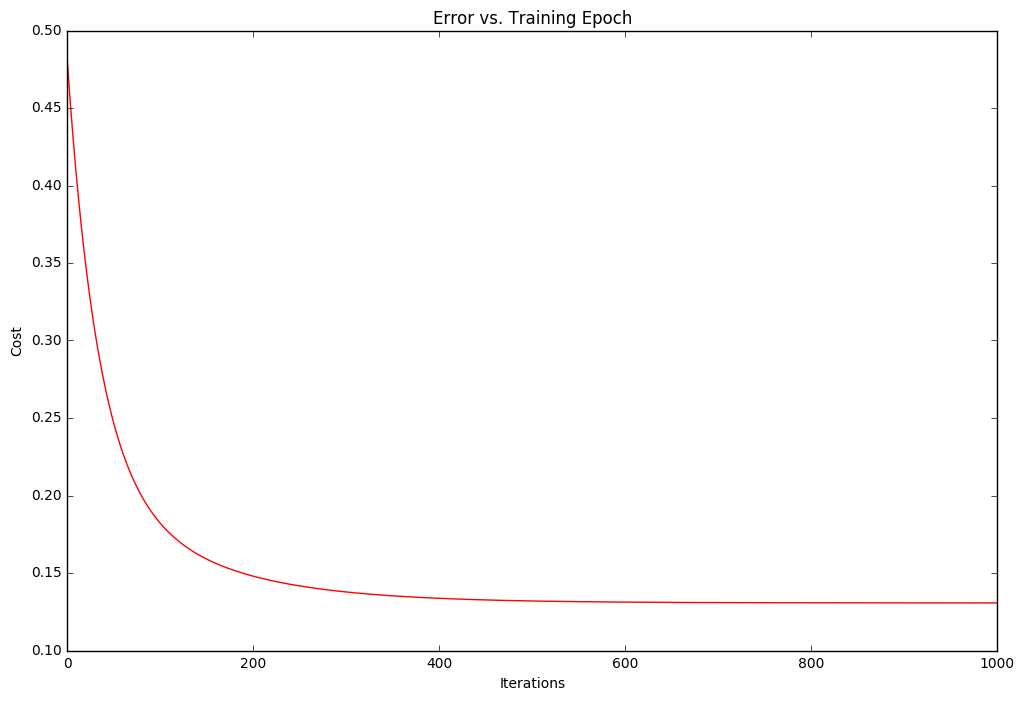

In [14]:
# プロット
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')